In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

11493376/11490434 [==============================] - 14s 1us/step
(60000, 28, 28)
(10000, 28, 28)


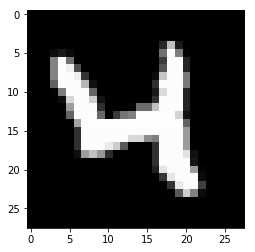

In [3]:
# download and load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
plt.imshow(x_train[20], cmap='gray')
plt.show()

In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('Training Set: ', x_train.shape[0])
print('Test Set:', x_test.shape[0])

Training Set:  60000
Test Set: 10000


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train) # 10 classes
y_test = keras.utils.to_categorical(y_test)
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
model = Sequential()
# model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 10 classes

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train,
 batch_size=128,
 epochs=10,#changed from 10*
 verbose=1,
 validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 137us/step - loss: 0.3663 - acc: 0.8889 - val_loss: 0.1110 - val_acc: 0.9668
Epoch 2/10
54000/54000 [==============================] - 6s 113us/step - loss: 0.1711 - acc: 0.9473 - val_loss: 0.0917 - val_acc: 0.9717
Epoch 3/10
54000/54000 [==============================] - 6s 113us/step - loss: 0.1335 - acc: 0.9594 - val_loss: 0.0723 - val_acc: 0.9798
Epoch 4/10
54000/54000 [==============================] - 4s 77us/step - loss: 0.1145 - acc: 0.9648 - val_loss: 0.0684 - val_acc: 0.9800
Epoch 5/10
54000/54000 [==============================] - 4s 69us/step - loss: 0.0974 - acc: 0.9695 - val_loss: 0.0693 - val_acc: 0.9803
Epoch 6/10
54000/54000 [==============================] - 3s 62us/step - loss: 0.0915 - acc: 0.9708 - val_loss: 0.0653 - val_acc: 0.9800
Epoch 7/10
54000/54000 [==============================] - 3s 61us/step - loss: 0.0812 - acc: 0.9744 - val_loss: 0.0600 - val_a

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', score[0])
print('Accuracy:', score[1])

Loss: 0.06609866693809745
Accuracy: 0.9801
